<a href="https://colab.research.google.com/github/OCE1984/MScDataAnaltyicsPrinciples/blob/main/Other_Student_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv("/content/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.drop('Cabin',axis=1, inplace=True)

In [ ]:
pd.set_option('future.no_silent_downcasting', True)

val = df.Age.mean()

df["Age"] = df["Age"].fillna(val)
#df.dropna(inplace= True, how='any')
df = df.dropna(subset=['Embarked'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [ ]:
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [ ]:
df["NameLength"] = df["Name"].apply(len)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,NameLength
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,51
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,44
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,24


In [ ]:
 #df[(df['Age']) > 30 & (df['Survived'] == 1) & (df["Pclass"] != 3)]
#df[df['Survived'] == 1 & df['Age']) > 30 ]
#5 visualisations

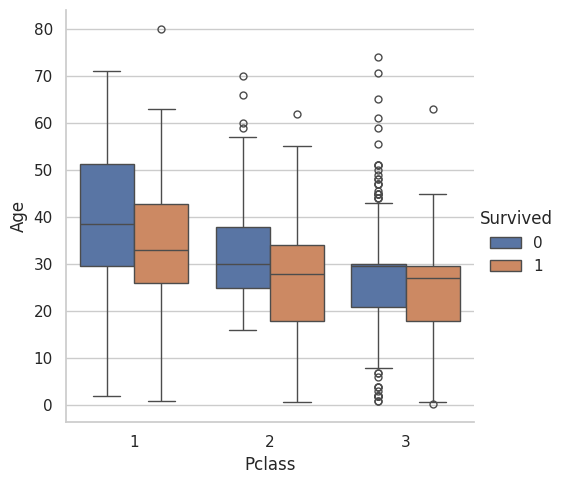

In [ ]:
sns.set_theme(style="whitegrid")

sns.catplot(data=df, x="Pclass", y="Age", kind="box", hue="Survived")

#Older passengers more likely to be in a better class
#Younger passengers on average more likely to survive



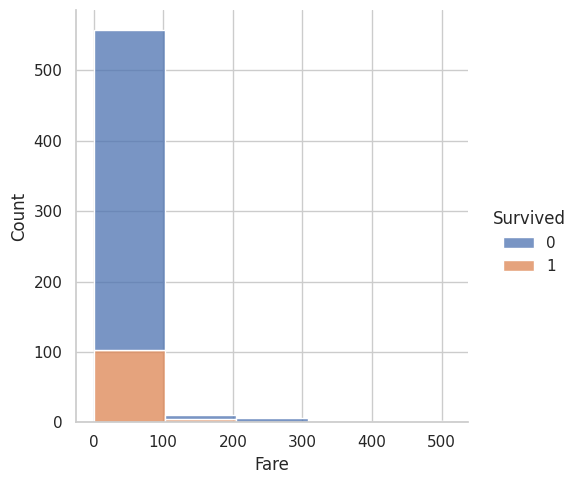

In [ ]:
sns.displot(df[df["Sex"] == "male"], x="Fare", bins=5, hue = df["Survived"], multiple="stack")

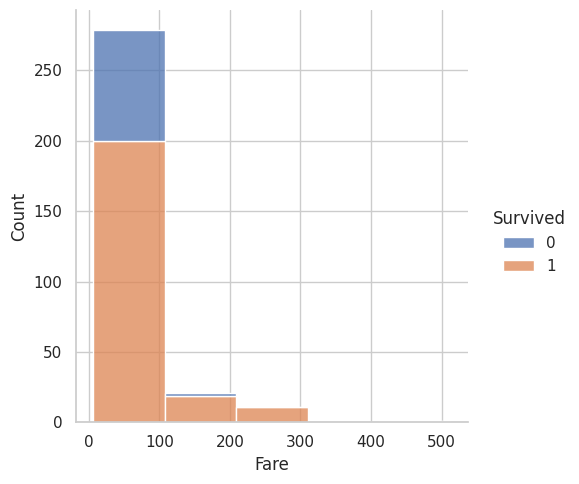

In [ ]:
sns.displot(df[df["Sex"] == "female"], x="Fare", bins=5, hue = df["Survived"],multiple="stack")

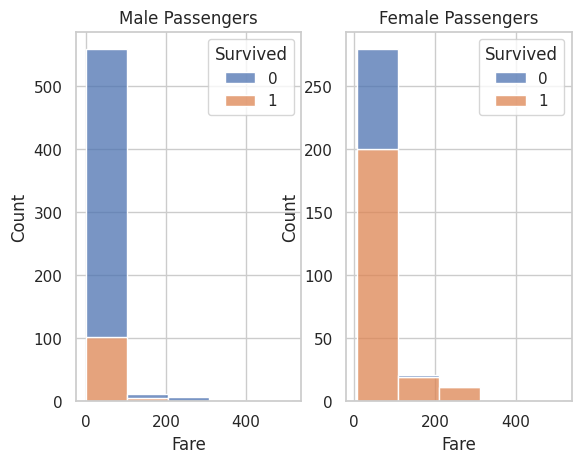

In [ ]:
fig, ax =plt.subplots(1,2)
sns.histplot(df[df["Sex"] == "male"], x="Fare", bins=5, hue = df["Survived"], multiple="stack", ax=ax[0]).set_title("Male Passengers")
sns.histplot(df[df["Sex"] == "female"], x="Fare", bins=5, hue = df["Survived"],multiple="stack" , ax=ax[1]).set_title("Female Passengers")
fig.show()

<Axes: xlabel='Survived', ylabel='Age'>

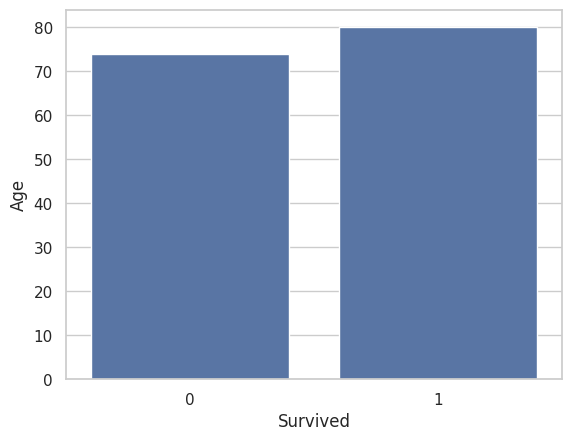

In [ ]:
grouped_data = df.groupby(["Survived"])["Age"].max()
sns.barplot(grouped_data)

<Axes: >

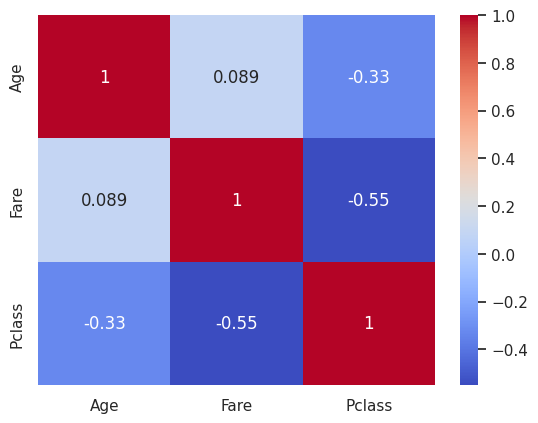

In [ ]:
#Correlation Heatmaps

df_corr = df[["Age","Fare","Pclass"]].corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm')

Workshop 7

In [ ]:
X = df[['Age']]
y = df['Fare']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
model_lr = LinearRegression()

In [ ]:
model_lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model_lr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))


2653.715422264954
0.005333036282429204


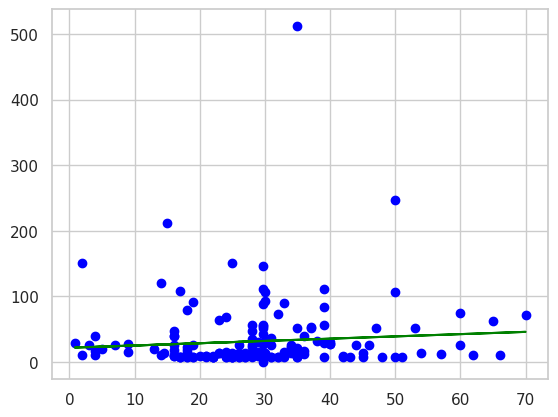

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='green')
plt.show()

Classification

In [ ]:
df2 = df[['Survived','Age','Sex','Pclass']]
df2 = pd.get_dummies(df2, columns=['Sex', 'Pclass'])
df2

,Survived,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,0,22.000000,False,True,False,False,True
1,1,38.000000,True,False,True,False,False
2,1,26.000000,True,False,False,False,True
3,1,35.000000,True,False,True,False,False
4,0,35.000000,False,True,False,False,True
...,...,...,...,...,...,...,...
886,0,27.000000,False,True,False,True,False
887,1,19.000000,True,False,True,False,False
888,0,29.699118,True,False,False,False,True
889,1,26.000000,False,True,True,False,False


In [ ]:
X = df2.drop('Survived', axis=1)
y = df2['Survived']

train_test_split(X, y, test_size=0.2, random_state = 42)


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
model_svc = SVC()

In [ ]:
param_grid = {
    'C': [0.01,1],
    'kernel': ['linear','rbf'],
    'degree': [1,2]
}

grid = GridSearchCV(model_svc, param_grid=param_grid, cv=5, verbose=True, scoring='accuracy')


In [ ]:
#from sklearn import preprocessing
#lab_enc = preprocessing.LabelEncoder()
#y_train = lab_enc.fit_transform(y_train)
#y_test = lab_enc.fit_transform(y_test)

In [ ]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 1], 'degree': [1, 2],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=True)

In [ ]:
y_pred = grid.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Precision:  0.726027397260274
Recall:  0.7681159420289855
F1 Score:  0.7464788732394366


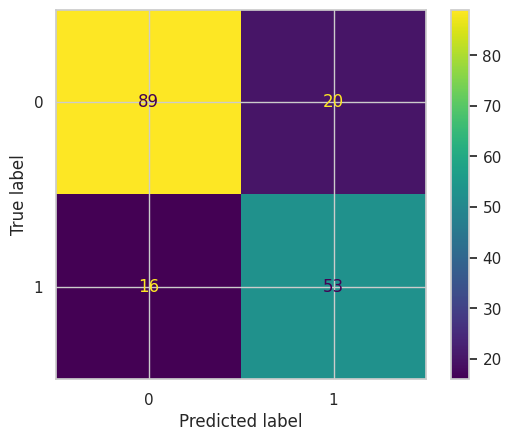

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=grid.classes_)
display.plot()

Please produce an SVM model to predict if someone is in First Class based on their Sex and Age

In [ ]:
df3 = df[['Age','Sex','Pclass']]

df3 = pd.get_dummies(df3, columns=['Sex', 'Pclass'])
df3

,Age,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,22.000000,False,True,False,False,True
1,38.000000,True,False,True,False,False
2,26.000000,True,False,False,False,True
3,35.000000,True,False,True,False,False
4,35.000000,False,True,False,False,True
...,...,...,...,...,...,...
886,27.000000,False,True,False,True,False
887,19.000000,True,False,True,False,False
888,29.699118,True,False,False,False,True
889,26.000000,False,True,True,False,False


In [ ]:
X = df3.drop(['Pclass_1','Pclass_2','Pclass_3'], axis=1)
y = df3['Pclass_1']

train_test_split(X, y, test_size=0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [ ]:
model_svc2 = SVC()

In [ ]:
param_grid = {
    'C': [0.01,1],
    'kernel': ['linear','rbf'],
    'degree': [1,2]
}

grid2 = GridSearchCV(model_svc2, param_grid=param_grid, cv=5, verbose=True, scoring='accuracy')


In [ ]:
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 1], 'degree': [1, 2],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=True)

In [ ]:
y_pred = grid2.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1= f1_score(y_test, y_pred)

print('Precision: ',precision)
print('Recall: ', recall)
print('F1 Score: ', f1)

Precision:  0.5384615384615384
Recall:  0.1590909090909091
F1 Score:  0.24561403508771928
